In [36]:
import pandas as pd
import numpy as np


data = pd.read_csv('data.csv')
A = pd.DataFrame(data, columns=['Candies (#)','Mangoes (Kg)','Milk Packets (#)'])
C = pd.DataFrame(data, columns=['Payment (Rs)'])
print('main matrix\n',data,'\n')
dim = data.shape
print('Dimensions: ',dim,'\n')
number_of_vectors = dim[0]
rank = np.linalg.matrix_rank(A)
print('Number of vectors: ',number_of_vectors,'\n')
print('A matrix\n',A,'\n')
print('Rank of A: ',rank,'\n')
print('C matrix\n',C,'\n')
Ainv = np.linalg.pinv(A)
# print('A inverse\n',Ainv,'\n')

# result = np.dot(Ainv,A)
# print('A inverse * A\n',result,'\n')

X = np.dot(Ainv,C)
print('X matrix\n',X,'\n')

print('cost of milk: ',X[0][0],'\n')
print('cost of mango: ',X[1][0],'\n')
print('cost of candy: ',X[2][0],'\n')
# check = np.dot(A,X)
# print('A * X\n',check,'\n')

# A3

data['Rich/Poor'] = np.where(data['Payment (Rs)'] >= 200, 'Rich', 'Poor')
print('data with rich/poor\n',data,'\n')

main matrix
   Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)
0      C_1           20             6                 2           386
1      C_2           16             3                 6           289
2      C_3           27             6                 2           393
3      C_4           19             1                 2           110
4      C_5           24             4                 2           280
5      C_6           22             1                 5           167
6      C_7           15             4                 2           271
7      C_8           18             4                 2           274
8      C_9           21             1                 4           148
9     C_10           16             2                 4           198 

Dimensions:  (10, 5) 

Number of vectors:  10 

A matrix
    Candies (#)  Mangoes (Kg)  Milk Packets (#)
0           20             6                 2
1           16             3                 6
2           27  

IRCTC data
              Month  Day    Price     Open     High      Low   Volume    Chg%
Date                                                                        
Jun 29, 2021   Jun  Tue  2081.85  2092.00  2126.90  2065.05    1.67M  0.0020
Jun 28, 2021   Jun  Mon  2077.75  2084.00  2112.45  2068.40  707.73K  0.0043
Jun 25, 2021   Jun  Fri  2068.85  2084.35  2088.50  2053.10  475.82K -0.0020
Jun 24, 2021   Jun  Thu  2072.95  2098.00  2098.00  2066.00  541.51K -0.0026
Jun 23, 2021   Jun  Wed  2078.25  2102.00  2111.40  2072.00  809.62K -0.0023
...            ...  ...      ...      ...      ...      ...      ...     ...
Jul 07, 2020   Jul  Tue  1397.40  1410.00  1411.00  1390.05  480.21K -0.0024
Jul 06, 2020   Jul  Mon  1400.75  1405.50  1415.50  1394.00  614.93K -0.0031
Jul 03, 2020   Jul  Fri  1405.10  1415.00  1425.00  1398.00  599.49K -0.0051
Jul 02, 2020   Jul  Thu  1412.35  1440.00  1467.80  1395.30    2.16M  0.0362
Jul 01, 2020   Jul  Wed  1363.05  1363.65  1377.00  1356.00  383

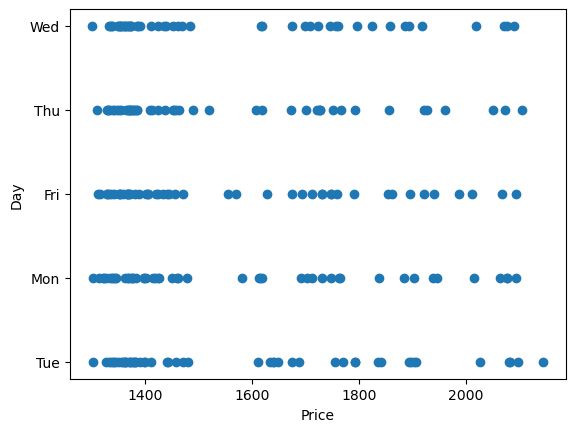

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# IRCTCdf = pd.read_csv('IRCTCdata.csv', usecols=['Date','Month','Day','Price','Open','High','Low','Volume','Chg%'])
IRCTCdf = pd.read_excel('Lab Session Data.xlsx', sheet_name='IRCTC Stock Price', usecols='A:I', index_col=0)

variance = np.var(IRCTCdf['Price'].to_numpy())
mean_wednesday = np.mean(IRCTCdf[IRCTCdf['Day'] == 'Wed']['Price'].to_numpy())
mean_population = np.mean(IRCTCdf['Price'].to_numpy())
mean_apr = np.mean(IRCTCdf[IRCTCdf['Month']=='Apr']['Price'].to_numpy())
diff_wednesday = mean_wednesday - mean_population
diff_Apr = mean_apr - mean_population
if diff_wednesday < 0:
    diff_wednesday = diff_wednesday * -1
if diff_Apr < 0:    
    diff_Apr = diff_Apr * -1
prob_loss = len(IRCTCdf[IRCTCdf['Chg%'] < 0])/len(IRCTCdf)
# profit_wed = len((IRCTCdf[IRCTCdf['Chg%'] > 0] & IRCTCdf[IRCTCdf['Day']=='Wed'])['CHg%'])/len(IRCTCdf[IRCTCdf['Day']=='Wed'])


temp = IRCTCdf[IRCTCdf['Chg%'] > 0]
profit_wed = len(temp[temp['Day']=='Wed'])/len(IRCTCdf[IRCTCdf['Day']=='Wed'])

plt.scatter(IRCTCdf['Price'],IRCTCdf['Day'])
plt.xlabel('Price')
plt.ylabel('Day')

print('IRCTC data\n',IRCTCdf,'\n')
print('Mean of Price: ',mean_population,'\n')
print('Variance of Price: ',variance,'\n')
print('Mean comparision with wednesday: ',diff_wednesday,'\n')
print('Mean comparision with April: ',diff_Apr,'\n')
print('Probability of loss: ',prob_loss,'\n')
print('Probability of profit on wednesday: ',profit_wed,'\n')
plt.show()



In [10]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import jaccard_score
from sklearn.preprocessing import LabelEncoder


data = pd.read_excel('Lab Session Data.xlsx', sheet_name='thyroid0387_UCI', usecols='A:AE')
datatypes = data.dtypes

nominal_cols = ['sex','on thyroxine', 'query on thyroxine', 'on antithyroid medication',
                    'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid',
                    'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych',
                    'TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured',
                    'TBG measured', 'referral source', 'Condition']
ordinal_cols = []
interval_cols = []
ratio_cols = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

for col in nominal_cols:
    data[col].replace('?', np.nan, inplace=True)
for col in ratio_cols:
    data[col].replace('?', np.nan, inplace=True)

encodeing = pd.DataFrame(columns=['Column Name', 'Encoding Type'])
print('data\n',data,'\n')

for cl in nominal_cols:
    encodeing = encodeing._append({'Column Name': cl, 'Encoding Type': 'One-hot encoding'}, ignore_index=True)
print('encoding of categorical data\n',encodeing,'\n')

range = pd.DataFrame(columns=['Column Name', 'Range'])
for cl in ratio_cols:
    data[cl] = pd.to_numeric(data[cl])
for cl in ratio_cols:
    range = range._append({'Column Name': cl, 'Range': [data[cl].min(), data[cl].max()]}, ignore_index=True)
print('range of numeric values\n',range,'\n')

print('missing values in each attribure\n')
for cl in data.columns:
    print(cl,' ', data[cl].isnull().sum())

# for cl in ratio_cols:
#     if data[cl] != np.NAN:
#         float(nan)

# from scipy.stats import zscore
print('\ncalculation of number of outliers using Z-score:\n')
for cl in ratio_cols:
        zsc = stats.zscore(data[cl].dropna())
        # zsc = np.abs(zscore(data[cl].dropna()))
        outliers = np.where(zsc > 3)[0]
        # print(cl)
        # print(outliers)
        if outliers.size > 0:
            print(outliers.size,'outliers in ',cl)
        else:
            print('no outliers in ',cl)

print('\nmean and variance of numerical columns\n')
mv = pd.DataFrame(columns=['Column name','mean','variance'])
for cl in ratio_cols:
    mv = mv._append({'Column name': cl,'mean': data[cl].mean(),'variance': data[cl].var()}, ignore_index = True)

print(mv)

print('imputation of missing values\n')
impc = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
impr = SimpleImputer(missing_values=np.nan, strategy='median')
for cl in data.columns:
    if cl in nominal_cols:
        data[[cl]] = impc.fit_transform(data[[cl]]) 
    elif cl in ratio_cols:
        data[[cl]] = impr.fit_transform(data[[cl]])
print('data after imputation\n',data,'\n')

print('\ndata normalization\n')

for cl in ratio_cols:
    scalar = MinMaxScaler()
    data[[cl]] = scalar.fit_transform(data[[cl]])

print('normalized data\n',data,'\n')

print('\nJaccard and SNC similarity between two records\n')

binary_cols = ['on thyroxine','query on thyroxine','on antithyroid medication','sick','pregnant','thyroid surgery','I131 treatment','query hypothyroid','query hyperthyroid','lithium','goitre','tumor','hypopituitary','psych','TSH measured','T3 measured','TT4 measured','T4U measured','FTI measured','TBG measured']
label_encoder = LabelEncoder()
for cl in binary_cols:
    data[cl] = label_encoder.fit_transform(data[cl])
print('data after encoding\n',data,'\n')

vector1 = data.loc[0, binary_cols].values.tolist()
vector2 = data.loc[1, binary_cols].values.tolist()




print('vector1: ',vector1)
print('vector2: ',vector2)

jacard = jaccard_score(vector1, vector2)

# count = np.where(vector1 == vector2)[0]
# count = len(count)
# snc = count/len(vector1)

print('Jaccard similarity: ',jacard)


# print('SNC similarity: ',snc)

# print('datatypes: ',datatypes,'\n')

# Record ID: 840801013
# age: 29 (Numeric)
# sex: F (Categorical - Nominal)
# on thyroxine: f (Categorical - Nominal)
# query on thyroxine: f (Categorical - Nominal)
# on antithyroid medication: f (Categorical - Nominal)
# sick: f (Categorical - Nominal)
# pregnant: f (Categorical - Nominal)
# thyroid surgery: f (Categorical - Nominal)
# I131 treatment: f (Categorical - Nominal)
# query hypothyroid: t (Categorical - Nominal)
# query hyperthyroid: f (Categorical - Nominal)
# lithium: f (Categorical - Nominal)
# goitre: f (Categorical - Nominal)
# tumor: f (Categorical - Nominal)
# hypopituitary: f (Categorical - Nominal)
# psych: f (Categorical - Nominal)
# TSH measured: t (Categorical - Nominal)
# TSH: 0.3 (Numeric)
# T3 measured: f (Categorical - Nominal)
# T3: ? (Numeric)
# TT4 measured: f (Categorical - Nominal)
# TT4: ? (Numeric)
# T4U measured: f (Categorical - Nominal)
# T4U: ? (Numeric)
# FTI measured: f (Categorical - Nominal)
# FTI: ? (Numeric)
# TBG measured: f (Categorical - Nominal)
# TBG: ? (Numeric)
# referral source: other (Categorical - Nominal)
# CONDITION (Categorical - Nominal),

data
       Record ID  age sex on thyroxine query on thyroxine  \
0     840801013   29   F            f                  f   
1     840801014   29   F            f                  f   
2     840801042   41   F            f                  f   
3     840803046   36   F            f                  f   
4     840803047   32   F            f                  f   
...         ...  ...  ..          ...                ...   
9167  870119022   56   M            f                  f   
9168  870119023   22   M            f                  f   
9169  870119025   69   M            f                  f   
9170  870119027   47   F            f                  f   
9171  870119035   31   M            f                  f   

     on antithyroid medication sick pregnant thyroid surgery I131 treatment  \
0                            f    f        f               f              f   
1                            f    f        f               f              f   
2                            f    f 

/var/folders/z5/n6pq_q4x69jfrk1p7lthb3xm0000gp/T/ipykernel_86920/1719919379.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].replace('?', np.nan, inplace=True)
/var/folders/z5/n6pq_q4x69jfrk1p7lthb3xm0000gp/T/ipykernel_86920/1719919379.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel('Lab Session Data.xlsx', sheet_name='thyroid0387_UCI', usecols='A:AE')

# Standardize numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Convert categorical variables to binary
df_binary = pd.get_dummies(df, drop_first=True)

# Select first 20 rows
df_20 = df_binary.iloc[:20]

# Initialize matrices
jc_matrix = np.zeros((20, 20))
smc_matrix = np.zeros((20, 20))
cosine_matrix = np.zeros((20, 20))

# Calculate similarities
for i in range(20):
    for j in range(20):
        vec1 = df_20.iloc[i].values  # Convert to numpy array
        vec2 = df_20.iloc[j].values  # Convert to numpy array
        
        f11 = sum((vec1 == 1) & (vec2 == 1))
        f10 = sum((vec1 == 1) & (vec2 == 0))
        f01 = sum((vec1 == 0) & (vec2 == 1))
        f00 = sum((vec1 == 0) & (vec2 == 0))
        
        jc_matrix[i, j] = f11 / (f11 + f10 + f01) if (f11 + f10 + f01) != 0 else 0
        smc_matrix[i, j] = (f11 + f00) / (f11 + f10 + f01 + f00) if (f11 + f10 + f01 + f00) != 0 else 0
        cosine_matrix[i, j] = cosine_similarity(vec1.reshape(1, -1), vec2.reshape(1, -1))[0][0]

# Plot heatmaps
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(jc_matrix, annot=True, cmap='coolwarm', cbar=False)
plt.title('Jaccard Coefficient Heatmap')

plt.subplot(1, 3, 2)
sns.heatmap(smc_matrix, annot=True, cmap='coolwarm', cbar=False)
plt.title('Simple Matching Coefficient Heatmap')

plt.subplot(1, 3, 3)
sns.heatmap(cosine_matrix, annot=True, cmap='coolwarm', cbar=False)
plt.title('Cosine Similarity Heatmap')

plt.tight_layout()
plt.show()


TypeError: 'DataFrame' object is not callable

TypeError: 'DataFrame' object is not callable